**PRAMOD PRAJAPAT**  (StudentId:
CT_CSI_DS_2820)
Chandigarh University

**STEP 1: Install and Import Required Libraries**

In [ ]:

!pip install spacy scikit-learn --quiet

import spacy
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load English spaCy model
import en_core_web_sm
nlp = en_core_web_sm.load()


**STEP 2: Load Dataset (20 Newsgroups)**

In [2]:

from sklearn.datasets import fetch_20newsgroups

# Removing headers, footers, and quotes to focus on content
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
documents = newsgroups.data[:2000]  # limit to 2000 for performance

print(f"Total documents loaded: {len(documents)}")
print("Sample document:\n")
print(documents[0])


Total documents loaded: 2000
Sample document:



I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However, I am going to put an end
to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they
are killing those Devils worse than I thought. Jagr just showed you why
he is much better than his regular season stats. He is also a lot
fo fun to watch in the playoffs. Bowman should let JAgr have a lot of
fun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final
regular season game.          PENS RULE!!!




**Step 3: Preprocessing (Tokenization + Stopword Removal using spaCy)**

In [3]:
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 94.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [4]:
import spacy

# Load spaCy's English model
nlp = spacy.load("en_core_web_sm")

# Define preprocessing function
def preprocess_spacy(doc):
    doc = nlp(doc.lower())
    return [token.lemma_ for token in doc if token.is_alpha and not token.is_stop]

# Preprocess all documents
processed_docs = [' '.join(preprocess_spacy(doc)) for doc in documents]


**Step 4: TF-IDF Vectorization**

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert text to TF-IDF features
vectorizer = TfidfVectorizer(max_df=0.5, min_df=5)
X = vectorizer.fit_transform(processed_docs)

print(f"TF-IDF shape: {X.shape}")


TF-IDF shape: (2000, 3679)


**Step 5: KMeans Clustering**

In [6]:
from sklearn.cluster import KMeans

num_clusters = 10  # you can tune this
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

# Cluster labels for each document
labels = kmeans.labels_


**Step 6: Visualize top keywords per cluster**

In [7]:
import numpy as np

def print_top_terms_per_cluster(tfidf_matrix, labels, vectorizer, n_terms=10):
    terms = vectorizer.get_feature_names_out()
    order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]

    for i in range(num_clusters):
        print(f"\nCluster {i} top terms:")
        top_terms = [terms[ind] for ind in order_centroids[i, :n_terms]]
        print(", ".join(top_terms))

print_top_terms_per_cluster(X, labels, vectorizer)



Cluster 0 top terms:
drive, disk, mb, controller, scsi, hard, floppy, ide, mac, system

Cluster 1 top terms:
game, like, go, think, time, year, good, get, know, people

Cluster 2 top terms:
people, know, say, state, mean, kill, right, law, see, use

Cluster 3 top terms:
card, driver, video, bus, vlb, cache, color, ati, vga, work

Cluster 4 top terms:
car, new, sell, use, work, buy, good, power, great, sale

Cluster 5 top terms:
think, oh, jim, hope, yeah, de, help, question, guy, quote

Cluster 6 top terms:
god, jesus, bible, christian, christ, believe, sin, church, people, scripture

Cluster 7 top terms:
window, file, program, run, use, work, server, application, problem, version

Cluster 8 top terms:
thank, mail, address, know, reply, look, email, list, like, send

Cluster 9 top terms:
key, space, clipper, phone, system, chip, encryption, orbit, station, public


**Step 7: 2D Cluster Visualization using PCA or t-SNE**

*Option A: PCA (Faster and simpler)*

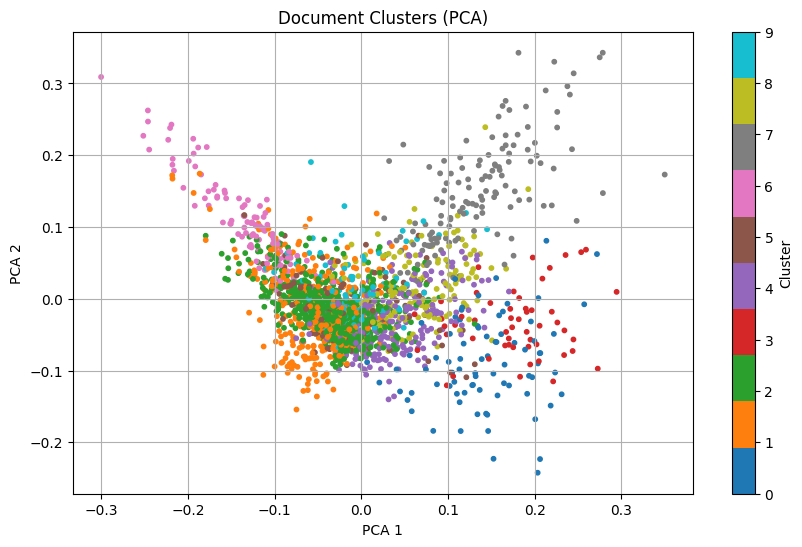

In [8]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce to 2D with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Plot the clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='tab10', s=10)
plt.title("Document Clusters (PCA)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.show()


*Option B: t-SNE (Better cluster separation, but slower)*

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


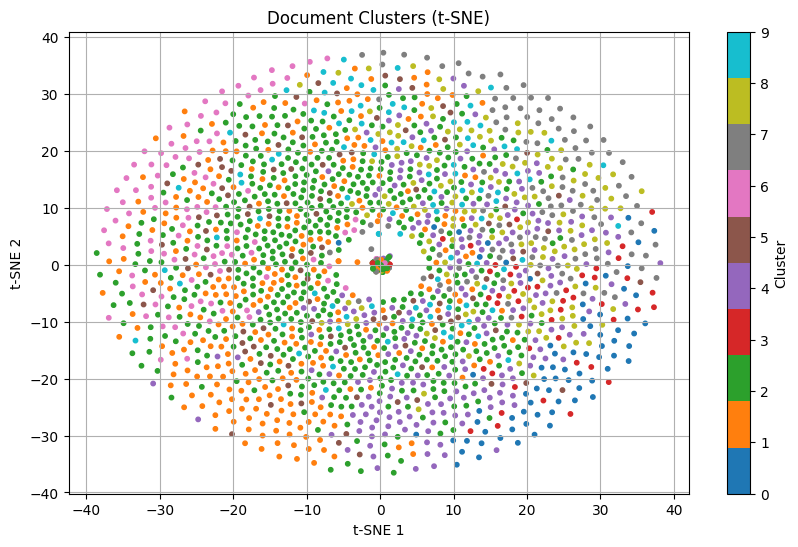

In [9]:
from sklearn.manifold import TSNE

# Reduce to 2D with t-SNE
tsne = TSNE(n_components=2, perplexity=40, n_iter=300, random_state=42)
X_tsne = tsne.fit_transform(X.toarray())

# Plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='tab10', s=10)
plt.title("Document Clusters (t-SNE)")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.show()


# **Final Step: Show example documents from each cluster**

In [10]:
from collections import defaultdict

# Group documents by cluster
cluster_examples = defaultdict(list)
for i, label in enumerate(labels):
    if len(cluster_examples[label]) < 2:  # show 2 samples per cluster
        cluster_examples[label].append(documents[i])

# Display
for cluster, examples in cluster_examples.items():
    print(f"\n=== Cluster {cluster} ===")
    for i, doc in enumerate(examples):
        print(f"\nDocument {i+1}:\n{doc[:500]}...\n")



=== Cluster 1 ===

Document 1:


I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However, I am going to put an end
to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they
are killing those Devils worse than I thought. Jagr just showed you why
he is much better than his regular season stats. He is also a lot
fo fun to watch in the playoffs. Bowman should let JAgr have a...


Document 2:

[stuff deleted]

Ok, here's the solution to your problem.  Move to Canada.  Yesterday I was able
to watch FOUR games...the NJ-PITT at 1:00 on ABC, LA-CAL at 3:00 (CBC), 
BUFF-BOS at 7:00 (TSN and FOX), and MON-QUE at 7:30 (CBC).  I think that if
each series goes its max I could be watching hockey playoffs for 40-some odd
consecutive nights (I haven't counted so that's a pure guess).

I have two tv's in my house, and I set them up side-by-side to